In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import recall_score, fbeta_score

df = pd.read_csv('C:\\Nikolay_Maachinka\\LungCancer\\LungCancer\\dataset.csv')
#"/home/alex/Документы/ML и Data Science/LungCancer/LungCancer/dataset.csv"
# Проверим данные
df.info() # Пропусков нет
df.describe() # Выбросов нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [2]:
# Разбиение на возрастные категории по риску
def age(_age):
  if _age < 20:
    return 0
  elif 20 >= _age < 40:
    return 1
  elif 40 >= _age < 60:
    return 2
  else:
    return 3
df['AGE'] = df['AGE'].apply(age)

In [3]:
# Кодируем категориальные данные
df['GENDER'] = df['GENDER'].map({'M':0, 'F':1})
df['LUNG_CANCER'] = df['LUNG_CANCER'].map({'NO':0, 'YES':1})

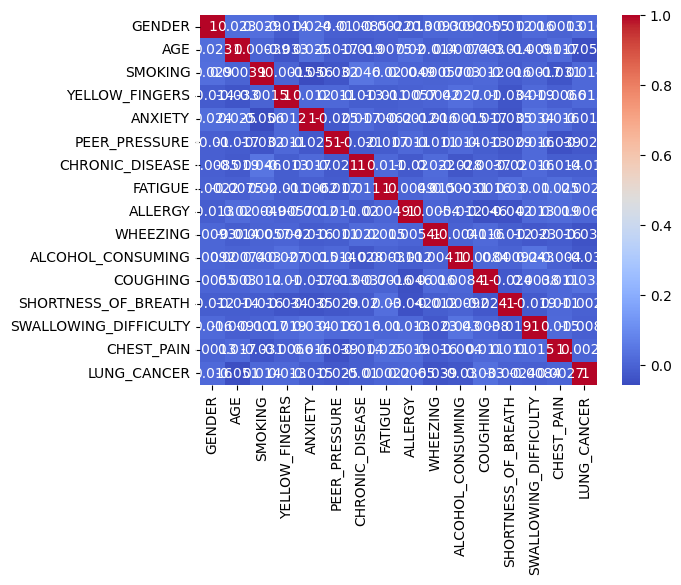

In [4]:
# Проверяем на отсутствие зависимых данных
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show() # Корреляций нет

In [16]:
# Разделяем данные на обучающую и тестовую выборки
X = df.drop(columns=['LUNG_CANCER'])  # Признаки (features)
y = df['LUNG_CANCER']  # Целевая переменная (target)
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X, y)
knn_clf_pred_res = knn_clf.predict(X_test)
knn_clf_f = fbeta_score(y_test, knn_clf_pred_res)
   
print(knn_clf_f)

ValueError: could not convert string to float: 'F'

In [23]:


# Создаём объект KFold для кросс-валидации
kf = KFold(n_splits=5, shuffle=True, random_state=42)
lst = []
# Цикл для перебора гиперпараметров
for train_index, val_index in kf.split(X):
    scaler = StandardScaler()
    X_train, X_val = X.loc[train_index], X.loc[val_index]
    # Применение стандартизации к числовым признакам (сначала обучаем скейлер на обучающих данных)
    X_train_scaled = scaler.fit_transform(X_train)
    # Применение обученного скейлера к тестовой выборке
    X_val_scaled = scaler.transform(X_val)
    y_train, y_val = y.loc[train_index], y.loc[val_index]
    # Обучение и тестирование модели происходит внутри этого цикла
    clf = RandomForestClassifier(n_estimators=100, max_depth=2, min_samples_split=3, random_state=123)
    clf.fit(X_train_scaled, y_train_scaled)
    y_pred = clf.predict(X_val)
    rec = recall_score(y_pred, y_val) # Изучить score, выбрать более подходящую
    lst.append(rec)
rec_mean=np.mean(lst)

KeyError: '[15, 25, 33, 80, 84, 85, 86, 101, 127, 148, 198, 206, 208, 220, 222, 235, 236, 242, 263, 275, 299, 305, 310, 319, 335, 343, 380, 417, 423, 465, 469, 476, 501, 511, 524, 547, 559, 577, 589, 591, 597, 618, 638, 641, 645, 647, 658, 664, 667, 697, 704, 709, 711, 717, 720, 729, 732, 742, 743, 777, 779, 797, 799, 800, 803, 805, 835, 850, 875, 884, 906, 917, 934, 957, 958, 967, 973, 977, 982, 984, 988, 994, 1002, 1003, 1020, 1032, 1035, 1043, 1049, 1052, 1068, 1078, 1079, 1094, 1102, 1134, 1185, 1186, 1188, 1203, 1204, 1206, 1208, 1216, 1224, 1285, 1294, 1304, 1318, 1335, 1342, 1351, 1356, 1360, 1373, 1386, 1396, 1397, 1402, 1415, 1481, 1518, 1522, 1549, 1571, 1572, 1587, 1591, 1599, 1608, 1623, 1655, 1658, 1663, 1667, 1672, 1680, 1690, 1691, 1711, 1724, 1746, 1765, 1768, 1778, 1786, 1796, 1797, 1800, 1804, 1807, 1837, 1856, 1863, 1884, 1895, 1898, 1907, 1908, 1918, 1945, 1980, 1984, 1998, 1999, 2001, 2005, 2016, 2020, 2042, 2063, 2096, 2101, 2113, 2120, 2126, 2157, 2163, 2199, 2202, 2224, 2226, 2230, 2247, 2257, 2267, 2273, 2280, 2311, 2324, 2343, 2368, 2394, 2415, 2417, 2419, 2437, 2442, 2463, 2472, 2516, 2530, 2531, 2535, 2553, 2575, 2588, 2590, 2597, 2663, 2676, 2694] not in index'